# The Family Dataset
This script inspects the family dataset to find out more about what is in there

In [1]:
from pykeen.triples import TriplesFactory
import torch 
import numpy as np

In [66]:
all_triples = TriplesFactory.from_path('all.txt')
train = TriplesFactory.from_path('train.txt', entity_to_id=all_triples.entity_to_id,
                                 relation_to_id=all_triples.relation_to_id,
                                 create_inverse_triples=False)
valid = TriplesFactory.from_path('valid.txt', entity_to_id=all_triples.entity_to_id,
                                 relation_to_id=all_triples.relation_to_id)
test = TriplesFactory.from_path('test.txt', entity_to_id=all_triples.entity_to_id,
                                relation_to_id=all_triples.relation_to_id)
print(train)
print(valid)
print(test)

TriplesFactory(num_entities=2745, num_relations=16, create_inverse_triples=False, num_triples=9058, path="/Users/werner/PycharmProjects/nesy_benchmark/datasets/family/augmented/train.txt")
TriplesFactory(num_entities=2745, num_relations=16, create_inverse_triples=False, num_triples=3146, path="/Users/werner/PycharmProjects/nesy_benchmark/datasets/family/augmented/valid.txt")
TriplesFactory(num_entities=2745, num_relations=16, create_inverse_triples=False, num_triples=4391, path="/Users/werner/PycharmProjects/nesy_benchmark/datasets/family/augmented/test.txt")


## Relation types 

In [36]:
print(all_triples.relation_to_id)

{'aunt': 0, 'brother': 1, 'child': 2, 'daughter': 3, 'father': 4, 'husband': 5, 'mother': 6, 'nephew': 7, 'niece': 8, 'parent': 9, 'partner': 10, 'sibling': 11, 'sister': 12, 'son': 13, 'uncle': 14, 'wife': 15}


## Count triples per relation

Count occurrences of relations in all.txt:
aunt, 1124
brother, 1174
child, 1401
daughter, 611
father, 774
husband, 421
mother, 658
nephew, 1361
niece, 1080
parent, 1432
partner, 848
sibling, 2173
sister, 999
son, 790
uncle, 1322
wife, 427

Number of triples in all.txt: 16596


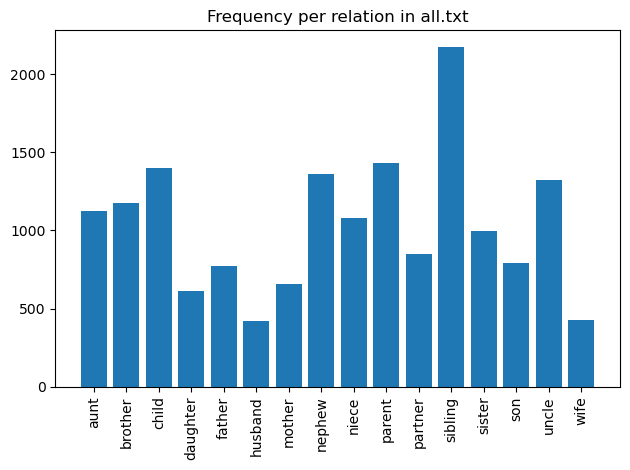

In [55]:
import matplotlib.pyplot as plt
def count_rels(filename, plot=False): 
    """counts occurrence of relations and plots it as histogram """
    _triples = open(filename).readlines()
    edge_index, edge_type = [], []
    for line in _triples:
        if len(line.split('\t')) != 3:
            continue
        head, relation, tail = line.split('\t')
        if tail.endswith('\n'):
            tail = tail[:-1]
        edge_index.append([int(head), int(tail)])
        edge_type.append(relation)
    
    print(f'Count occurrences of relations in {filename}:')
    val, cnt = [], []
    for v in sorted(set(edge_type)):
        print(f'{v}, {edge_type.count(v)}')
        val.append(v)
        cnt.append(edge_type.count(v))
    if plot:
        # plt.hist(val, weights=cnt, rwidth=.9)
        plt.bar(val, cnt)
        # plt.hist(val, weights=cnt, width=0.9)
        plt.title(f'Frequency per relation in {filename}')
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.savefig('freq_'+filename+'.pdf')
    print(f'\nNumber of triples in {filename}: {len(_triples)}\n\n')

count_rels('all.txt', plot=True)

Count occurrences of relations in train.txt:
aunt, 622
brother, 633
child, 765
daughter, 325
father, 412
husband, 239
mother, 352
nephew, 757
niece, 578
parent, 764
partner, 476
sibling, 1185
sister, 552
son, 440
uncle, 721
wife, 237

Number of triples in train.txt: 9058


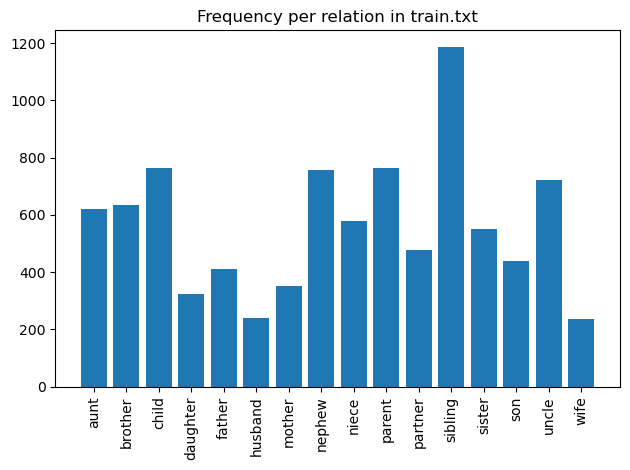

In [56]:
count_rels('train.txt', plot=True)

Count occurrences of relations in valid.txt:
aunt, 216
brother, 220
child, 266
daughter, 113
father, 143
husband, 83
mother, 122
nephew, 263
niece, 201
parent, 265
partner, 165
sibling, 412
sister, 192
son, 153
uncle, 250
wife, 82

Number of triples in valid.txt: 3146


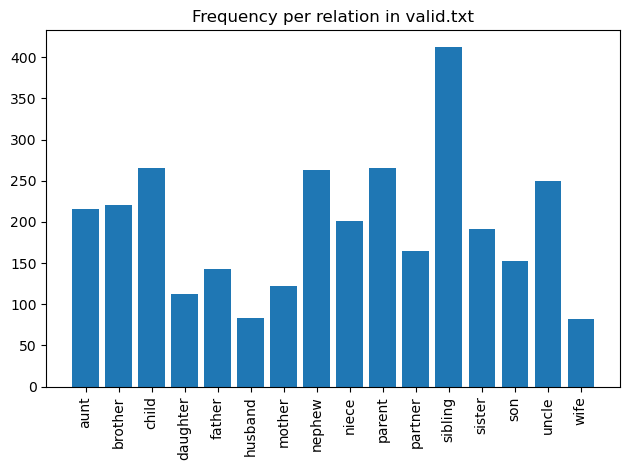

In [57]:
count_rels('valid.txt', plot=True)

Count occurrences of relations in test.txt:
aunt, 286
brother, 321
child, 370
daughter, 173
father, 219
husband, 99
mother, 184
nephew, 341
niece, 301
parent, 403
partner, 207
sibling, 576
sister, 255
son, 197
uncle, 351
wife, 108

Number of triples in test.txt: 4391


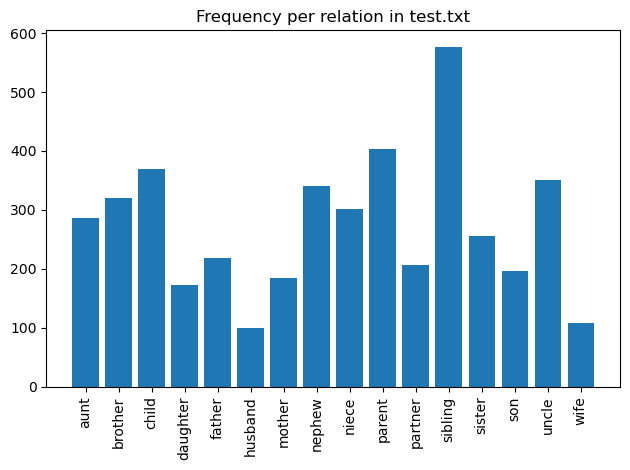

In [58]:
count_rels('test.txt', plot=True)

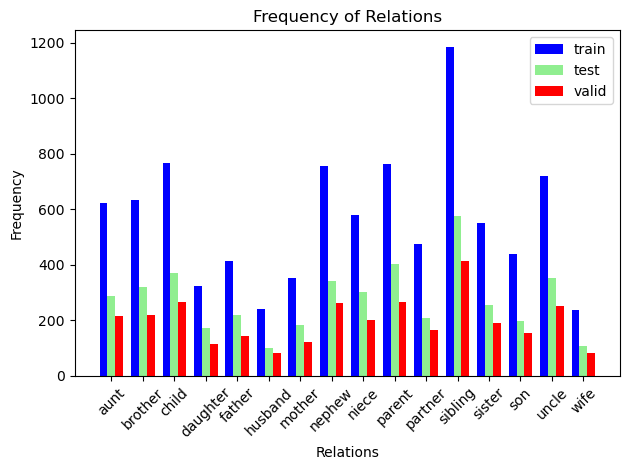

In [71]:
# plot together
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['aunt', 'brother', 'child', 'daughter', 'father', 'husband', 'mother', 'nephew', 'niece', 'parent', 'partner', 'sibling', 'sister', 'son', 'uncle', 'wife']
frequencies_1 = [622, 633, 765, 325, 412, 239, 352, 757, 578, 764, 476, 1185, 552, 440, 721, 237]
frequencies_2 = [286, 321, 370, 173, 219, 99, 184, 341, 301, 403, 207, 576, 255, 197, 351, 108]
frequencies_3 = [216, 220, 266, 113, 143, 83, 122, 263, 201, 265, 165, 412, 192, 153, 250, 82]

# Colors for bars
colors = ['blue', 'lightgreen', 'red']

# Width of each bar
bar_width = 0.25

# X-axis positions for each group of bars
x = np.arange(len(labels))

# Plotting
fig, ax = plt.subplots()
for i, (freq_1, freq_2, freq_3) in enumerate(zip(frequencies_1, frequencies_2, frequencies_3)):
    ax.bar(x[i] - bar_width, freq_1, color=colors[0], width=bar_width, label='List 1' if i == 0 else None)
    ax.bar(x[i], freq_2, color=colors[1], width=bar_width, label='List 2' if i == 0 else None)
    ax.bar(x[i] + bar_width, freq_3, color=colors[2], width=bar_width, label='List 3' if i == 0 else None)

# Adding labels and title
ax.set_xlabel('Relations')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Relations')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(['train', 'test', 'valid'])

# Show plot
plt.tight_layout()
plt.savefig('freq_merged.pdf')
plt.show()





# One-to-many relations ?

In [72]:
for i, rel in enumerate(all_triples.relation_to_id.keys()):    
    idx= all_triples.mapped_triples[:, 1] == all_triples.relation_to_id[rel]
    _triples = all_triples.mapped_triples[idx]
    m_heads = _triples[:, 0]
    m_tails = _triples[:, 2]
    unique_heads = torch.unique(m_heads)
    print('\n')
    print(f"{i}. Relation <{rel}>")
    print(f"Number of unique heads with relation <{rel}> : {len(unique_heads)}")
    unique_tails = torch.unique(m_tails)
    print(f"Number of unique heads with relation <{rel}> : {len(unique_tails)}")
    heads = {}
    tails = {}
    for head in unique_heads:
        heads[head.item()] = len(_triples[_triples[:, 0] == head])
    for tail in unique_tails:
        tails[tail.item()] = len(_triples[_triples[:, 2] == tail])
    print("################################# Heads #################################")
    print(f"(head, <{rel}>, tail) - One head has minimum {min(heads.values())} different tails")
    print(f"(head, <{rel}>, tail) - One head has in average {sum(heads.values())/len(heads.values())} different tails")
    print(f"(head, <{rel}>, tail) - One head has median {np.median(list(heads.values()))} different tails")
    print(f"(head, <{rel}>, tail) - One head has maximum {max(heads.values())} different tails")
    print("################################# Heads #################################")
    print(f"(head, <{rel}>, tail) - One head has minimum {min(tails.values())} different heads")
    print(f"(head, <{rel}>, tail) - One head has in average {sum(tails.values())/len(tails.values())} different heads")
    print(f"(head, <{rel}>, tail) - One head has median {np.median(list(tails.values()))} different heads")
    print(f"(head, <{rel}>, tail) - One head has maximum {max(tails.values())} different heads")
    



0. Relation <aunt>
Number of unique heads with relation <aunt> : 358
Number of unique heads with relation <aunt> : 706
################################# Heads #################################
(head, <aunt>, tail) - One head has minimum 1 different tails
(head, <aunt>, tail) - One head has in average 3.1396648044692737 different tails
(head, <aunt>, tail) - One head has median 2.0 different tails
(head, <aunt>, tail) - One head has maximum 15 different tails
################################# Heads #################################
(head, <aunt>, tail) - One head has minimum 1 different heads
(head, <aunt>, tail) - One head has in average 1.5920679886685551 different heads
(head, <aunt>, tail) - One head has median 1.0 different heads
(head, <aunt>, tail) - One head has maximum 6 different heads


1. Relation <brother>
Number of unique heads with relation <brother> : 587
Number of unique heads with relation <brother> : 781
################################# Heads ######################


## We can summarize on the relations: 

### Aunt: many-to-many
> a person can have several aunts
a person can be aunt for several other people
theoretically and empirially 

### Brother: many-to-many
> a person can have several brothers
a person can be brother for several people. 
theoretically and empirically 

### Daughter: many-to-two
> a person can have several daughters
a person can be daughter for maximum two people

### Father: one-to-many relation
> a person has only one father
a person can be father for several people

### Husband: one-to-one
> a person can have one husband
a person can be husband for one person
(some empirical exceptions in data)

### Mother: one-to-many relation
> a person has only one mother
a person an be mother for several people

### Nephew : many-to-many 
> a person can have several nephews
a person can be nephew to several

### Niece: many-to-many 
> a person can have several nieces
a person can be niece to several

### Sister: many-to-many
> a person can have several sisters
a person can be sister to several

### Son: many-to-two
> a person can have several sons
a person can be the son of only two people 

### Uncle: many-to-many
> a person can have several uncles
a person can be uncle to several people

### Wife: one-to-one
> a person can have one wife
a person can be the wife of several people
(some exceptions in the data) 

The relations are read as follows : Aunt(x,y) = x is aunt of y. Aunt = "isAuntOf"
